# Transformation Digitale

**Je suis *`NGOLO Christ Peryclais`* *Data Scientist Junior* et *futur Machine Learning Engineer*, pasionné par l'Intelligence Artificielle, notamment le *Machine et Deep Learning*, la *Vision par Ordinateur*, le *Cloud Computing*, l'*Internet des Objets (IoT)*, la *Réalité Virtuelle et Augmentée***

**Contact : *christ.peryclais@gmail.com* / *+242 06 451 7200***

In [1]:
# Importations des librairies nécessaires au travail
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Chargement des données de la table en ligne
cms_df = pd.read_excel("web.xlsx")

# Fichier de liaison entre les deux tables
lien_df = pd.read_excel("liaison.xlsx")

# Données de l'erp
erp_df = pd.read_excel("erp.xlsx")

In [7]:
# Apperçu des 5 premières lignes du Data set web
cms_df.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0


In [8]:
# Premières lignes du Data set lien
lien_df.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [9]:
# Renomer la colonne "sku" du data set web_df en "id_web" pour effectuer la fusion
cms_df = cms_df.rename({"sku":"id_web"}, axis=1)

In [10]:
# Réafficher les premières lignes pour voir le changement
cms_df.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0


In [11]:
# Aperçu de erp_df
erp_df.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [12]:
# Joindre les Data set lien_df et erp_df
liaison_df = pd.merge(lien_df, erp_df, on="product_id")

In [13]:
liaison_df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status
0,3847,15298,1,24.2,0,outofstock
1,3849,15296,1,34.3,0,outofstock
2,3850,15300,1,20.8,0,outofstock
3,4032,19814,1,14.1,0,outofstock
4,4039,19815,1,46.0,0,outofstock


#  - Exploratory Data Analysis
## Objectifs :
- Rapprochement entre la table CMS et la table ERP
- Affichage du chiffre d'affaires des produits et le total du chiffre d'affaires
- Identification et visualisation des valeurs abérantes sur les prix des produits
- Regression linéaire sur les prix de vin en fonction des variables quantitatives
- Construction des profils de vins (Clustering avec KMeans)
- Choix du nombre optimal de cluster

## Checklist
### Analyse de forme :
- **Variable target**    : price
- **Lignes et colonnes** : 896, 7
- **Types de variables** : qualitatives et quantitatives
- **Analyse des variables manquantes** :
    - Pas beacoup de NaN car, 2 variables dont le taux le plus élévé est de 20%
    - 2 groupes de données 10% => total des ventes et 20% => identifiant web

### Analyse de fond :
- **Visualisation de la target**  :

- **Signification des variables** :

- **Relation variables / target** :

### Conclusions initiales :
- Le total des ventes suit une distribution gaussiènne (distribution normale)
- Le prix des produits par contre ne suit pas la même distribution


## 1. Rapprochement (joindre) CMS (Boutique en ligne => SKU) et l'ERP

In [14]:
# Assembler les Data set cms et erp suivant une colonne commune "id_web"
data = pd.merge(liaison_df, cms_df, on=("id_web"))
data.columns

Index(['product_id', 'id_web', 'onsale_web', 'price', 'stock_quantity',
       'stock_status', 'virtual', 'downloadable', 'rating_count',
       'average_rating', 'total_sales', 'tax_status', 'tax_class',
       'post_author', 'post_date', 'post_date_gmt', 'post_content',
       'post_title', 'post_excerpt', 'post_status', 'comment_status',
       'ping_status', 'post_password', 'post_name', 'post_modified',
       'post_modified_gmt', 'post_content_filtered', 'post_parent', 'guid',
       'menu_order', 'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [15]:
# Apperçu des 5 premières lignes du Dataset
data.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
1,3847,15298,1,24.2,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0
3,3849,15296,1,34.3,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.wine-spirit.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,3850,15300,1,20.8,0,outofstock,0,0,0,0.0,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.wine-spirit.fr/?post_type=product&...,0.0,product,NaN,0.0


### L'analyse de forme

In [16]:
# Avant tout, il est toujours mieux de faire une copie des données
# pour pouvoir gader l'originale et travailler avec la copie
vin_df = data.copy() # df pour DataFrame

In [17]:
# Connaitre le nbre de lignes et de colonnes (taille du Dataset)
vin_df.shape

(9163, 33)

In [18]:
# Suppression de certaines colonnes non utiles pour la suite
# axis = 1 désigne l'axe des colonnes (l'axe sur lequel appliquer les modifications)

vin_df.drop(["virtual", "downloadable", "rating_count", "average_rating", "tax_status",
              "tax_class", "post_author", "post_date", "post_date_gmt", "post_content",
             "post_title", "post_excerpt", "post_status", "comment_status", "ping_status",
             "post_password", "post_name", "post_modified", "post_modified_gmt", 
              "post_content_filtered", "post_parent", "guid", "menu_order", "post_type",
             "post_mime_type", "comment_count"], axis=1, inplace=True)

In [19]:
# Voyons à nouveau la taille de nos données
vin_df.shape

(9163, 7)

In [20]:
# Les 5 premières lignes du DataFrame
vin_df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales
0,3847,15298,1,24.2,0,outofstock,6.0
1,3847,15298,1,24.2,0,outofstock,6.0
2,3849,15296,1,34.3,0,outofstock,0.0
3,3849,15296,1,34.3,0,outofstock,0.0
4,3850,15300,1,20.8,0,outofstock,0.0


In [21]:
# Affiher les 10 dernières lignes du DataFrame
vin_df.tail(10)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales
9153,6930,16135,1,8.4,83,instock,5.0
9154,6930,16135,1,8.4,83,instock,5.0
9155,7023,15891,1,27.5,15,instock,0.0
9156,7023,15891,1,27.5,15,instock,0.0
9157,7025,15887,1,69.0,2,instock,0.0
9158,7025,15887,1,69.0,2,instock,0.0
9159,7247,13127-1,1,54.8,23,instock,0.0
9160,7247,13127-1,1,54.8,23,instock,0.0
9161,7338,16230,1,16.3,45,instock,0.0
9162,7338,16230,1,16.3,45,instock,0.0


In [22]:
# Description du DataFrame, elle nous permet de voir uniquement les
# statistiques de base de chaque colonne du DataFrame ayant des données numériiques
vin_df.describe()

,product_id,onsale_web,price,stock_quantity,total_sales
count,9163.000000,9163.000000,9163.000000,9163.000000,1610.000000
mean,5964.424533,0.183673,33.780934,16.706319,3.559006
std,1157.058018,0.387239,21.328694,30.955762,8.119252
min,3847.000000,0.000000,5.200000,0.000000,0.000000
25%,4721.000000,0.000000,20.500000,0.000000,0.000000
50%,6572.000000,0.000000,30.500000,5.000000,0.000000
75%,7084.000000,0.000000,44.000000,21.000000,4.000000
max,7338.000000,1.000000,225.000000,578.000000,96.000000


In [23]:
# Voyons voir les informations nécessaires aux différentes colonnes du DataFrame
# Afin d'observer les valeurs manquantes dans chaque colonne
vin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9163 entries, 0 to 9162
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      9163 non-null   int64  
 1   id_web          1428 non-null   object 
 2   onsale_web      9163 non-null   int64  
 3   price           9163 non-null   float64
 4   stock_quantity  9163 non-null   int64  
 5   stock_status    9163 non-null   object 
 6   total_sales     1610 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 572.7+ KB


#### Petite Analyse :
*Après la fusion des tables, on se rend compte que le Data set comporte des doublons.
Il faut donc les éliminer sinon tout le reste de l'analyse ne sera pas miel*

## C'est parti !

**Il y a t-il des valeurs en double dans notre ensemble de données et combien il y a en a au total ?** *Si c'est le cas, il faut alors les `supprimer` !*

In [24]:
# Existe t-il des doublons dans nos données ?
vin_df.duplicated()

0       False
1        True
2       False
3        True
4       False
        ...  
9158     True
9159    False
9160     True
9161    False
9162     True
Length: 9163, dtype: bool

In [25]:
# Combien de doublons avons-nous au total dans cet ensemble de données ?
vin_df.duplicated().sum()

8267

In [26]:
# Réaffichons les premières lignes de nos données
vin_df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales
0,3847,15298,1,24.2,0,outofstock,6.0
1,3847,15298,1,24.2,0,outofstock,6.0
2,3849,15296,1,34.3,0,outofstock,0.0
3,3849,15296,1,34.3,0,outofstock,0.0
4,3850,15300,1,20.8,0,outofstock,0.0


In [29]:
# Suppression des doublons en gardant uniquement les premières occurrences 
# Car elles correspondent aux produits
vin_df = vin_df.drop_duplicates(keep="first").reset_index(drop=True)

# reset_index permet de redéfinir les index par défaut

In [30]:
# Les doublons sont t-ils réelement éliminés ? Alors, vérifions !
vin_df.duplicated().sum()

0

In [31]:
# Vérification des changements apportés à notre ensemble de données
# En affichant cette fois-ci les 10 premières lignes de données
vin_df.head(10)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales
0,3847,15298,1,24.2,0,outofstock,6.0
1,3849,15296,1,34.3,0,outofstock,0.0
2,3850,15300,1,20.8,0,outofstock,0.0
3,4032,19814,1,14.1,0,outofstock,3.0
4,4039,19815,1,46.0,0,outofstock,0.0
5,4040,15303,1,34.3,0,outofstock,0.0
6,4041,14975,1,32.7,15,instock,0.0
7,4042,16042,1,31.2,34,instock,7.0
8,4043,14980,1,60.0,12,instock,3.0
9,4045,16041,1,42.6,66,instock,14.0


In [32]:
# Quelle est la nouvelle taille de notre DataFrame ?
vin_df.shape

(896, 7)

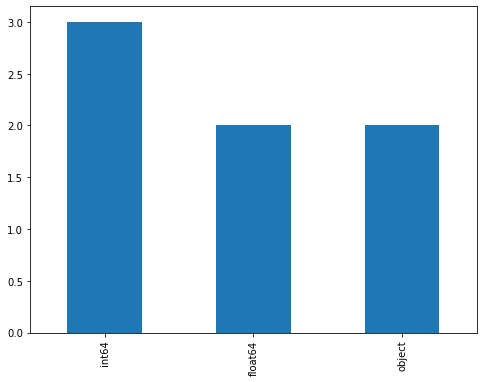

In [33]:
# Alors, visualisons tous les types de données dans notre DataFrame
vin_df.dtypes.value_counts().plot(kind="bar", figsize=(8, 6));

**Combien de `valeurs manquantes` avons-nous au total dans notre ensemble de données ?**

In [34]:
# Le total des valeurs manquantes
(vin_df.isna().sum()).sum()

273

In [35]:
# Le nombre de valeurs manquantes présentes dans chaque colonne du DataFrame
vin_df.isna().sum()

product_id          0
id_web            182
onsale_web          0
price               0
stock_quantity      0
stock_status        0
total_sales        91
dtype: int64

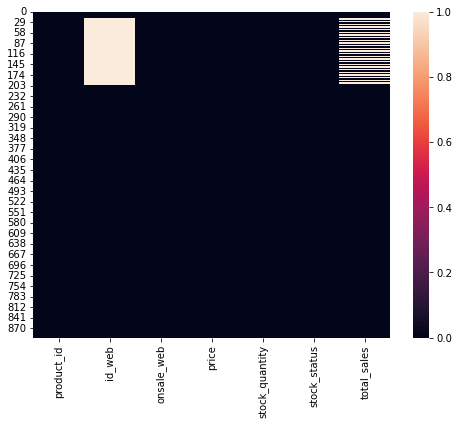

In [36]:
# Analysons les valeurs manquantes tout en les visualisant
plt.figure(figsize=(8, 6))
sns.heatmap(vin_df.isna());

In [39]:
# En terme de pourcentage, quel est le pourcentage de valeurs manquantes dans ces colonnes ?

# Pourcentage de toutes les valeurs manquantes  trié de façon croissante
(vin_df.isna().sum()/vin_df.shape[0]).sort_values(ascending=True)

product_id        0.000000
onsale_web        0.000000
price             0.000000
stock_quantity    0.000000
stock_status      0.000000
total_sales       0.101562
id_web            0.203125
dtype: float64

### Analyse de fond

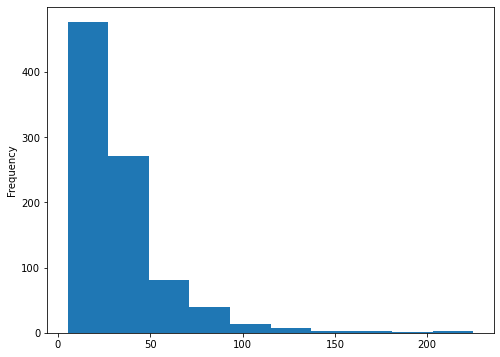

In [40]:
# Visualisons la donnée cible "price" (la target)
vin_df.price.plot(kind="hist", figsize=(8, 6));

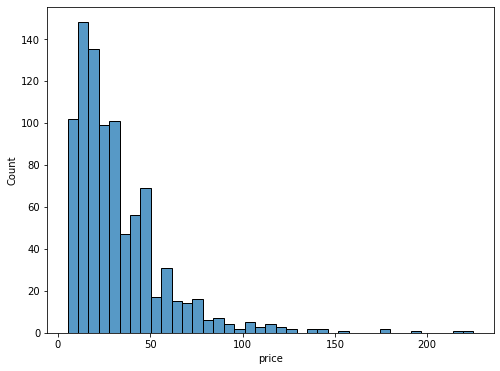

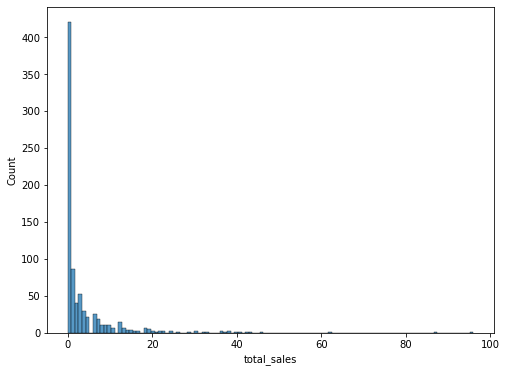

In [41]:
# Signification des variables quantitatives (continues)
# Historique de chaque variable continue

for col in vin_df.select_dtypes("float"):
    
    plt.figure(figsize=(8, 6))
    # affichage de chaque variable continue
    sns.histplot(vin_df[col]);

**Les variables *`qualitatives`***

In [42]:
"""
La fonction pd.head() est une fonction vraiment sollicitée dans tous les projets Data Science.
En effet, elle permet chaque fois de voir le contenu de nos données et cela est très utile
dans tout le processus de resolution ou de réponses aux différentes questions.
Dans l'évolution de résolution de notre problématique, il arrive très souvent que l'on fasse
des modifications, donc, il est impératif de revoir à quoi ressemble nos données à l'instant t
"""
vin_df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales
0,3847,15298,1,24.2,0,outofstock,6.0
1,3849,15296,1,34.3,0,outofstock,0.0
2,3850,15300,1,20.8,0,outofstock,0.0
3,4032,19814,1,14.1,0,outofstock,3.0
4,4039,19815,1,46.0,0,outofstock,0.0


In [43]:
# Vérification de chaque catégorie
vin_df["stock_status"].unique()

array(['outofstock', 'instock'], dtype=object)

In [44]:
# Ici la colonne "onsale_web" est catégorisée par deux valeurs (1 => "Yes" et 0 => "No")
vin_df["onsale_web"].unique()

array([1, 0], dtype=int64)

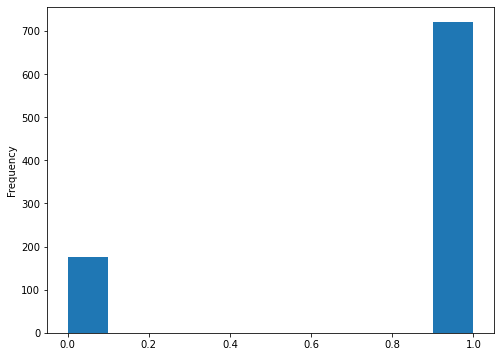

In [45]:
# Visualisons ces variables qualitatives (Catégorielles)
vin_df.onsale_web.plot(kind="hist", figsize=(8, 6));

**Voyons-voir ce que cela donnera, en visualisant de manière générale toutes les colonnes de nos données** 

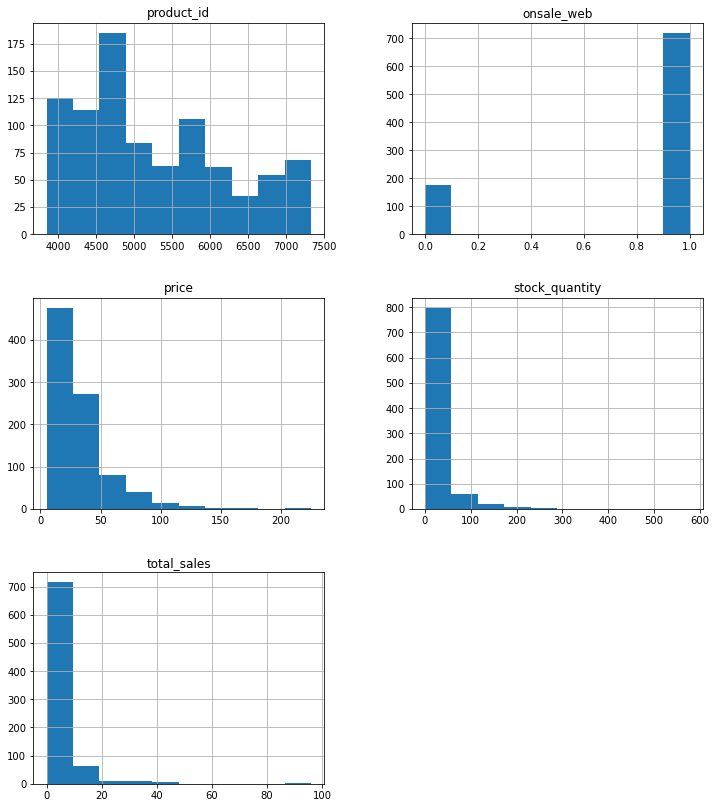

In [46]:
# Visualisons l'ensemble de toutes nos données numériques en histogramme
vin_df.hist(figsize=(12, 14));

## 2. Chiffre d'affaires des produits et le total du chiffre d'affaires

In [47]:
# Voyons encore les premières lignes de notre ensemble de données
vin_df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales
0,3847,15298,1,24.2,0,outofstock,6.0
1,3849,15296,1,34.3,0,outofstock,0.0
2,3850,15300,1,20.8,0,outofstock,0.0
3,4032,19814,1,14.1,0,outofstock,3.0
4,4039,19815,1,46.0,0,outofstock,0.0


#### - Calcul du Chiffre d'affaires de chaque produit

In [48]:
"""
Je prefère garder le chiffre d'affaire en Anglais parce que toutes les colonnes sont
en Anglais et donc c'est sera bien de continuer à faire de cette manière afin de garder
la cohérence que d'avoir des colonnes nommées dans deux langues différentes
"""

# Le chiffre d'affaires est égal au prix du produit multiplié par sa quantité vendue
# La colonne "turnover" en Anglais désigne le chiffre d'affaires de chaque produit
vin_df["turnover"] = vin_df["price"] * vin_df["total_sales"]

In [49]:
# Vérifions si le chiffre d'affaire calculé est bel et bien dans notre DataFrame
# En affichant que les 10 premières lignes de nos données
vin_df.head(10)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,turnover
0,3847,15298,1,24.2,0,outofstock,6.0,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0
3,4032,19814,1,14.1,0,outofstock,3.0,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,0.0
5,4040,15303,1,34.3,0,outofstock,0.0,0.0
6,4041,14975,1,32.7,15,instock,0.0,0.0
7,4042,16042,1,31.2,34,instock,7.0,218.4
8,4043,14980,1,60.0,12,instock,3.0,180.0
9,4045,16041,1,42.6,66,instock,14.0,596.4


#### - Total du chiffre d'affaire réalisé

In [50]:
# Quel est le chiffre d'affaires total réalisé ?
total_turnover = vin_df["turnover"].sum()

In [51]:
# Affichage du chiffre d'affaire total réalisé
print(f"Votre chiffre d'affaire total réalisé est de : {total_turnover} €")

Votre chiffre d'affaire total réalisé est de : 70568.6 €


## 3. Identification et Visualisation des valeurs abérantes (outliers) 

In [52]:
# Quelle est la taille actuelle du DataFrame ?
vin_df.shape

(896, 8)

In [53]:
# Combien de données aurons-nous après élimination des valeurs manquantes ?
vin_df.dropna().count()

product_id        714
id_web            714
onsale_web        714
price             714
stock_quantity    714
stock_status      714
total_sales       714
turnover          714
dtype: int64

In [54]:
# Découverons encore les 10 dernières lignes de nos données
vin_df.tail(10)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,turnover
886,6886,14897,1,42.0,0,outofstock,0.0,0.0
887,6887,15736,1,21.8,24,instock,0.0,0.0
888,6920,15740,1,50.5,1,instock,0.0,0.0
889,6926,15845,1,49.9,24,instock,1.0,49.9
890,6928,15741,1,19.0,20,instock,2.0,38.0
891,6930,16135,1,8.4,83,instock,5.0,42.0
892,7023,15891,1,27.5,15,instock,0.0,0.0
893,7025,15887,1,69.0,2,instock,0.0,0.0
894,7247,13127-1,1,54.8,23,instock,0.0,0.0
895,7338,16230,1,16.3,45,instock,0.0,0.0


### - Approche Statistique
#### La détectection des valeurs aberrantes encore appellées *`Outliers`*

#### - Méthode 1 :  *`Z Score` (supérieur à 2 standard deviation)*

In [55]:
"""
np.mean(data) nous donnera la moyenne de nos données
np.std(data) nous donnera l'écart type de nos données

Fonctionnement de la fonction 'detecte_outlier()'

On procède à la comparaison :
    Si la valeur absolue de z-score est supérieure à la valeur limite,
    alors cette valeur est dite abérrante et on l'ajoute dans la liste.
    Sinon, elle n'est pas aberrante, on ne l'ajoute pas à la liste 
    et l'on passera direcetment à la prochaine itération, ainsi de suite
"""

# Détection des outliers : méthode de Z-Score

# La liste vide qui recevra toutes les valeurs aberrantes
outlier = [] 

# La fonction qui permet de détecter ces valeurs
def detecte_outlier(data):
    
    # La valeur limite pour qu'une valeur soit considérée comme étant abérrante
    LIMITE = 2
    # On fait le parcour des données
    for x in data:
        z_score = (x-np.mean(data) / np.std(data))
        
        if np.abs(z_score) > LIMITE:
            outlier.append(x)
    # On retourne la liste de toutes les valeurs aberrantes
    return outlier

In [57]:
# Application de la fonction sur les prix des produits
detecte_outlier(vin_df["price"])

[24.2,
 34.3,
 20.8,
 14.1,
 46.0,
 34.3,
 32.7,
 31.2,
 60.0,
 42.6,
 80.0,
 18.3,
 22.8,
 19.3,
 21.8,
 7.7,
 33.7,
 44.3,
 71.6,
 86.1,
 86.1,
 73.0,
 73.0,
 47.0,
 47.0,
 14.1,
 14.1,
 73.5,
 73.5,
 20.0,
 20.0,
 21.5,
 21.5,
 10.8,
 10.8,
 30.5,
 30.5,
 49.0,
 49.0,
 40.0,
 40.0,
 144.0,
 144.0,
 36.9,
 36.9,
 23.6,
 23.6,
 12.0,
 12.0,
 18.5,
 18.5,
 34.5,
 34.5,
 20.5,
 20.5,
 23.8,
 23.8,
 20.2,
 20.2,
 13.5,
 13.5,
 13.8,
 13.8,
 12.7,
 12.7,
 14.6,
 14.6,
 23.0,
 23.0,
 10.0,
 10.0,
 8.0,
 8.0,
 10.0,
 10.0,
 84.7,
 84.7,
 43.3,
 43.3,
 47.0,
 47.0,
 19.9,
 19.9,
 29.2,
 29.2,
 34.2,
 34.2,
 42.5,
 42.5,
 14.2,
 14.2,
 92.0,
 92.0,
 28.5,
 28.5,
 9.1,
 9.1,
 28.0,
 28.0,
 28.0,
 28.0,
 24.0,
 24.0,
 18.0,
 18.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 40.0,
 30.0,
 30.0,
 26.0,
 26.0,
 30.0,
 30.0,
 20.0,
 20.0,
 31.0,
 31.0,
 27.0,
 27.0,
 31.0,
 31.0,
 21.0,
 21.0,
 31.0,
 31.0,
 27.0,
 27.0,
 31.0,
 31.0,
 21.0,
 21.0,
 40.0,
 40.0,
 40.0,
 40.0,
 47.0,
 47.0,
 4

#### - Méthode 2 :  *Celle des `interquartiles`*

In [58]:
# On déinfinit la fonction qui renvoi la liste de tous les indexes des outliers
def outliers(df, ft):
    
    # 1er quartile
    Q1 = df[ft].quantile(0.25)
    # 3ème quartile
    Q3 = df[ft].quantile(0.75)
    
    # Calcul de l'interquartile
    IQR = Q3 - Q1
    
    # Définir les limites
    upper_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    
    # Liste de stockage des indexes de valeurs abérrantes
    indexes = df.index[(df[ft] > upper_limit) | (df[ft] < low_limit)]
    
    # Renvoyer cette liste
    return indexes

**Application de la méthode des `interquartiles`**

In [59]:
# Liste de tous les indexes de sortie
liste_index = []
for feature in ["price"]:
    liste_index.extend(outliers(vin_df, feature))

In [60]:
# On affiche les éléments de cette liste
print(liste_index)

[19, 20, 41, 42, 75, 76, 91, 92, 245, 247, 381, 383, 387, 400, 401, 403, 404, 409, 562, 563, 608, 613, 614, 619, 620, 684, 693, 735, 769, 784, 785, 786, 824, 829, 830, 835, 836, 837, 838, 839]


In [61]:
# Combien d'occurrences y a t-il dans cette liste ?
len(liste_index)

40

### - Approche graphique

#### - Méthode 1 : *Celle des `Nuages de Points`*

In [62]:
# Réaffichons l'entête de l'ensemble de nos données
vin_df.head()

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,turnover
0,3847,15298,1,24.2,0,outofstock,6.0,145.2
1,3849,15296,1,34.3,0,outofstock,0.0,0.0
2,3850,15300,1,20.8,0,outofstock,0.0,0.0
3,4032,19814,1,14.1,0,outofstock,3.0,42.3
4,4039,19815,1,46.0,0,outofstock,0.0,0.0


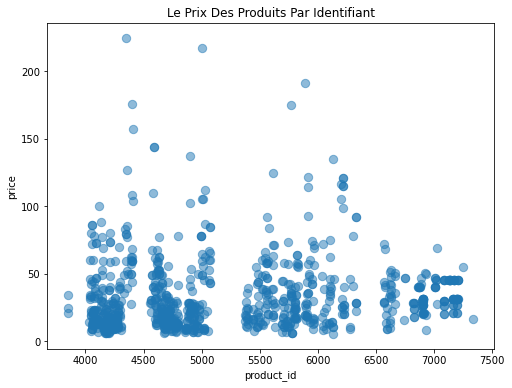

In [63]:
# Détectection de valeurs aberrantes avec les nuages de points

# s et alpha désignent respectivement la taille et la transparence des points
vin_df.plot.scatter("product_id", "price", s=70, alpha=0.5, figsize=(8, 6))
plt.title("Le Prix Des Produits Par Identifiant");

#### - Méthode 2 : *Celle du `Boxplot`*

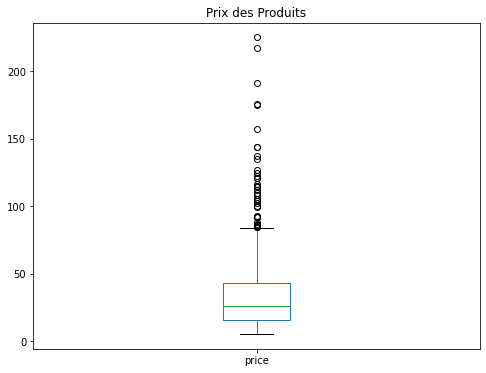

In [64]:
# Technique de visualisation avec boxplot (diagramme de moustache)
vin_df.price.plot(kind="box", figsize=(8, 6))
plt.title("Prix des Produits");

# Pré-Traitement de données
***C'est une étape consistant à préparer les données avant de les fournir à la machine pour son apprentissage***
### Obejectifs : 
#### 1. Mettre les données dans un format adapté pour développer le modèle de Machine Learning (ML)
- **Suppression des Outliers** : *Ces valeurs sont néfastes au développement du modèle*
- **Train set / Test set** : *division de données en deux parties, celle d'entrainement du modèle et celle pour tester le modèle*
- **Encodage de données** : *transformer les variables catégorielles en variables numériques*
- **Nettoyage des NaN**
   
##### Création du premier modèle : le but ici est de faire une évaluation de la performance du modèle

#### 2. Améliorer la performance du modèle en ayant le Dataset le plus propre possible
- **Feature Selection** 
- **Feature Engineering**
- **Feature Scaling**

#### 1. Mettre les données dans un format propice au développement du modèle de Machine Learning

In [66]:
# Avant tout on va devoir supprimer une colonne de plus dont je ne trouve pas pertinente
# En effet, elle contient aussi des erreurs de saisie pas la peine de la garder
vin_df.drop("id_web", axis=1, inplace=True)

In [67]:
# Visualiser les données après modification
vin_df.head()

,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,turnover
0,3847,1,24.2,0,outofstock,6.0,145.2
1,3849,1,34.3,0,outofstock,0.0,0.0
2,3850,1,20.8,0,outofstock,0.0,0.0
3,4032,1,14.1,0,outofstock,3.0,42.3
4,4039,1,46.0,0,outofstock,0.0,0.0


In [69]:
# Définir les données manquantes
missing_rate = vin_df.isna().sum()/vin_df.shape[0]

In [70]:
# Voir les données manquantes
missing_rate

product_id        0.000000
onsale_web        0.000000
price             0.000000
stock_quantity    0.000000
stock_status      0.000000
total_sales       0.101562
turnover          0.101562
dtype: float64

#### - Supprimer les valeurs abérrantes (outliers) afin d'avoir le Data set le plus propre possible

In [71]:
# Définir une fonction qui supprime les outliers
def remove(df, indexes):
    
    # Trier la liste des indexes
    indexes = sorted(set(indexes))
    
    # Suppression
    df = df.drop(indexes)
    
    # Renvoyer un Data set sans outliers
    return df

In [72]:
# Suppression des outliers afin de travailler avec un Data set sans outliers
vin_df_cleaned = remove(vin_df, liste_index)

In [73]:
vin_df_cleaned.shape

(856, 7)

### Train set / Test set : Séparation de données

In [74]:
# train_set = jeu de données d'entrainement et test_set = jeu de données de test du modèle
train_set, test_set = train_test_split(vin_df_cleaned, train_size=0.80, random_state=0)

In [75]:
# Vérification des valeurs d'entrainement du modèle
train_set["price"].value_counts()

31.0    23
45.0    23
40.0    13
21.0     9
19.0     8
        ..
7.2      1
10.6     1
17.8     1
22.5     1
42.6     1
Name: price, Length: 308, dtype: int64

In [76]:
# Vérification des valeurs de test du modèle
test_set["price"].value_counts()

45.0    5
30.0    4
13.5    4
10.7    3
5.7     2
       ..
24.4    1
34.2    1
12.2    1
62.4    1
9.7     1
Name: price, Length: 142, dtype: int64

In [77]:
# Apperçu des données
vin_df_cleaned.head()

,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,turnover
0,3847,1,24.2,0,outofstock,6.0,145.2
1,3849,1,34.3,0,outofstock,0.0,0.0
2,3850,1,20.8,0,outofstock,0.0,0.0
3,4032,1,14.1,0,outofstock,3.0,42.3
4,4039,1,46.0,0,outofstock,0.0,0.0


**Pour des raisons de clarté et de saisie, nous allons renomer le DataFrame**

In [78]:
# Renomons le DataFrame
wine_df = vin_df_cleaned

In [79]:
# Veuillons observer à nouveau les premières lignes de notre ensemble de données
wine_df.head()

,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,turnover
0,3847,1,24.2,0,outofstock,6.0,145.2
1,3849,1,34.3,0,outofstock,0.0,0.0
2,3850,1,20.8,0,outofstock,0.0,0.0
3,4032,1,14.1,0,outofstock,3.0,42.3
4,4039,1,46.0,0,outofstock,0.0,0.0


In [80]:
# Notre ensemble de données a t-il la même taille ?
wine_df.shape

(856, 7)

#### Encodage des données
*Convertir les données qualitatives en données numériques*

In [81]:
"""
L'encodage est l'une des étapes les plus importantes dans ce processus d'implémentation du
modèle de Machine Learning car, la Machine ne peut que faire les calculs avec des données
numériques et c'est là tout son importance en effet, elle permet de convertir toute donnée
catégorielle (qualitative) en donnée continue (quantitative)

J'aurai pu travailler avec la fonction map() en creant un dictionnaire de données des catégories
avec leur équivalent en entier mais j'ai preféré utiliser la fonction replace() en effet,
cette fonction (replace()) est beacoup plus explicite que la fonction map()
"""

# Définir une fonction d'encodage sur le Data Fram
def encodage(df):
    
    # transfomer toutes les variables catégorielles en entier
    # code = {"instock": 1, "outofstock": 0}
    
    # application sur toutes les colonnes de type object
    for col in df.select_dtypes("object"):
        df.loc[:, col] = df[col].replace(["instock", "outofstock"], [1, 0])
    
    return df

In [82]:
# Avant tout voyons voir de nouveau le pourcentage des valeurs manquantes avant de prendre
# une quelconque décision sur la manière dont nous allons les traiter
missing_rate.sort_values(ascending=True)

product_id        0.000000
onsale_web        0.000000
price             0.000000
stock_quantity    0.000000
stock_status      0.000000
total_sales       0.101562
turnover          0.101562
dtype: float64

#### Nettoyage ou Imputation de données
*D'apprès l'affichage des pourcentages de toutes les valeurs manquantes, on se rend compte qu'il n'y a pas assez de valeurs qui manquent. Donc, on prend comme décision de supprimer toutes ces valeurs manquantes comme quoi, l'impacte ne sera pas trop élévé*

In [83]:
# Fonction de nettoyage
def imputation(df):
    
    # suppression des valeurs manquantes
    df = df.dropna(axis=0)
    return df

In [84]:
# Mise en place de la fonction de pré-processing
def preprocessing(df):
    
    # Application des fonctions d'encodage et d'imputation
    df = encodage(df)
    df = imputation(df)
    
    # x_train et y_test pour faire le Machine Learning (Régression linéaire)
    X = df.drop("price", axis=1) # Toutes les colonnes sauf celle du prix des produits
    y = df["price"]
    
    # Affichage des données de la target
    print(y.value_counts())
    
    # Retourner le train et test
    return X, y

In [66]:
# Diviser le jeu d'entrainement en deux : X_train et y_train
X_train, y_train = preprocessing(train_set)

31.0    12
45.0    10
40.0     7
12.7     7
11.1     6
        ..
28.8     1
86.1     1
13.1     1
40.7     1
59.8     1
Name: price, Length: 345, dtype: int64


#### Normaliser les données
*Mettre sur une même échelle toutes les données quantitatives*

In [67]:
 # Instance de la classe StandardScaler()
scaler = StandardScaler()

In [68]:
# Développer puis appliquer la transformation des données
scaler.fit_transform(X_train, y_train)

array([[ 0.49518052,  0.36883926, -0.58892102,  0.5251606 , -0.28985925,
        -0.18781877],
       [ 0.6508023 ,  0.36883926,  0.46774297,  0.5251606 , -0.28985925,
        -0.182362  ],
       [-0.42649497,  0.36883926,  0.81230731,  0.5251606 , -0.16976937,
        -0.20643601],
       ...,
       [-0.11963512,  0.36883926, -0.56595006,  0.5251606 , -0.40994914,
        -0.27769511],
       [-0.30484696,  0.36883926,  0.35288819,  0.5251606 , -0.28985925,
        -0.21092983],
       [ 0.42394519,  0.36883926, -0.61189197, -1.90417942, -0.40994914,
        -0.27769511]])

In [69]:
# Diviser le jeu de test en deux : X_test et y_tes
X_test, y_test = preprocessing(test_set)

45.0    5
19.0    5
8.7     3
29.0    3
16.3    3
       ..
42.0    1
15.2    1
7.8     1
17.9    1
14.9    1
Name: price, Length: 121, dtype: int64


In [70]:
# Taille des données X d'entrainement
print("Train set shape :", X_train.shape)

Train set shape : (643, 6)


In [71]:
# Taille des données X de test
print("Test set shape:", X_test.shape)

Test set shape: (162, 6)


## Modélisation
- **Création du modèle :** *Régression Linéaire comme modèle*

Comme modèle conseillé d'utiliser, la *Régression Linéaire* permet d'établir une relation linéaire entre la variable cible (target) "prix" de vin qui est une vrariable expliquée et les variables quantitatives (discrètes) dites variables explicatives

In [72]:
# Création du modèle
model = LinearRegression()

In [73]:
# Entrainer le modèle sur le jeu d'entrainement
model.fit(X_train, y_train)

LinearRegression()

In [74]:
# Evaluer la performance du modèle sur le jeu de test
model.score(X_test, y_test)

0.17956096630083485

In [75]:
# Faire des prédictions sur le modèle en fonction des variables quantitatives
y_pred = model.predict(X_test)

# Observer les prédictions
print(y_pred)

[ 29.00423532  17.89944428 -28.65056465  16.96115199  33.87008911
  40.20227554  27.49648038  32.14497077  24.65630392  34.11678181
  -0.30835573  35.30569057  31.39670318  10.17436499  36.02737287
  18.50446616  23.9191979   31.23725849  36.90056086  16.61884735
  -0.56961836  14.38842937  35.55163525  34.44958977  32.77946384
  40.27515892  37.43287001  33.28271408  33.35760374  36.76859628
  37.48079475  40.83698638  30.57198995  11.08896322  33.76187929
  15.71894944  40.33886092  35.00236383  33.50827715  21.73675602
  27.46777199  30.06278723  37.64122891  40.00672707  39.80972009
  24.71674987  20.2772089   41.45957036  38.20102911  33.29801521
  32.23093644  34.86456598  53.4205468   33.79236745  35.97917117
  30.89620324  30.32181055  38.10770251  35.95834801  22.90905444
  31.07164356  37.82367127  37.2309393   38.06397217  32.20249397
  38.31311965  33.78410436  35.89571841  36.03352176  29.92713996
  28.34985895  28.64610292  34.65609626  31.55313905  37.69756045
  31.33976

In [76]:
print(y_test)

60     13.5
733    12.9
506     8.6
806     8.5
505    29.5
       ... 
635    19.5
308     7.6
384    51.6
895    16.3
1      34.3
Name: price, Length: 162, dtype: float64


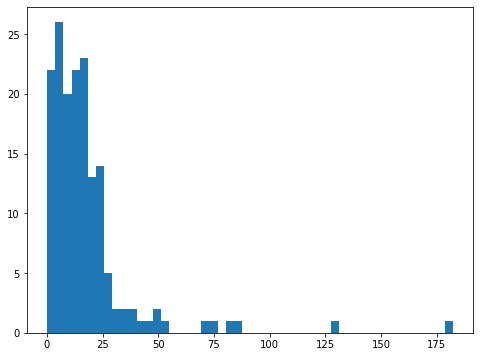

In [77]:
# Calcul et visualisation des erreurs de prédiction
error_hist = np.abs(y_test - y_pred)
plt.figure(figsize=(8, 6))
plt.hist(error_hist, bins=50)
plt.show()

### - Calcul de la métrique R2 sur les deux jeux (train_set et test_set)

**NB :** *Le R2 évalue la performance du modèle par rapport au niveau de variation présent dans les données*

In [78]:
# Remplir la matrice avec la moyenne de y_train
y_train_mean = np.full(len(y_train), y_train.mean())

# Combien vaut la moyenne de y_train ?
y_train.mean()

32.764074650077795

In [79]:
# Calcul de la métrique R2 entre y_train et sa moyenne
r2_score(y_train, y_train_mean)

0.0

In [80]:
# Métrique R2 sur  y_train
r2_score(y_train, y_train)

1.0

In [81]:
# Remplir une matrice avec la moyenne de y_test
y_test_mean = np.full(len(y_test), y_test.mean())

In [82]:
y_test.mean()

32.2746913580247

In [83]:
# Calcul de la métrique entre y_test et la moyenne de y_test
r2_score(y_test, y_test_mean)

0.0

In [84]:
# Métrique R2 sur y_test
r2_score(y_test, y_test)

1.0

#### Conclusion sur la métrique :
*On se rend compte que sur le jeu d'entrainement tout comme sur le jeu de test, la métrique R2 se comporte de façon indentique*

# Bonus

1- **Construction des profils de vin** : *Le* ***KMeans*** *est un algorithme d'**apprentissage non supervisé** basé sur le **clustering** (classication). Son principe de fonctionnement est le suivant :* Après avoir indiqué à l'algo le nombre de **clusters** à trouver, celui-ci tente par itérations successives de déterminer des **controïdes** (point central de regroupement, dont un par cluster) autour desquels il est possible de regrouper les données.


2- **Choix du nombre optimal de cluster** : 

In [85]:
df.head()

,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,turnover
0,3847,1,24.2,0,outofstock,6.0,145.2
1,3849,1,34.3,0,outofstock,0.0,0.0
2,3850,1,20.8,0,outofstock,0.0,0.0
3,4032,1,14.1,0,outofstock,3.0,42.3
4,4039,1,46.0,0,outofstock,0.0,0.0


In [86]:
# Importer l'estimateur KMeans
from sklearn.cluster import KMeans

In [87]:
# Travailler sur la copie du Data Set
data = df.copy()

In [88]:
data.head()

,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,turnover
0,3847,1,24.2,0,outofstock,6.0,145.2
1,3849,1,34.3,0,outofstock,0.0,0.0
2,3850,1,20.8,0,outofstock,0.0,0.0
3,4032,1,14.1,0,outofstock,3.0,42.3
4,4039,1,46.0,0,outofstock,0.0,0.0


In [89]:
# Création du modèle
model = KMeans(n_clusters=3)

In [90]:
# Entrainer et faire des prédictions sur le modèle
y_pred = model.fit_predict(df[["product_id", "price"]])

In [91]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [92]:
# Coordonées des centroïdes
model.cluster_centers_

array([[6939.65100671,   33.98187919],
       [4501.84123711,   26.38917526],
       [5783.87837838,   30.31328829]])

In [93]:
data["cluster"] = y_pred

In [94]:
data.head()

,product_id,onsale_web,price,stock_quantity,stock_status,total_sales,turnover,cluster
0,3847,1,24.2,0,outofstock,6.0,145.2,1
1,3849,1,34.3,0,outofstock,0.0,0.0,1
2,3850,1,20.8,0,outofstock,0.0,0.0,1
3,4032,1,14.1,0,outofstock,3.0,42.3,1
4,4039,1,46.0,0,outofstock,0.0,0.0,1


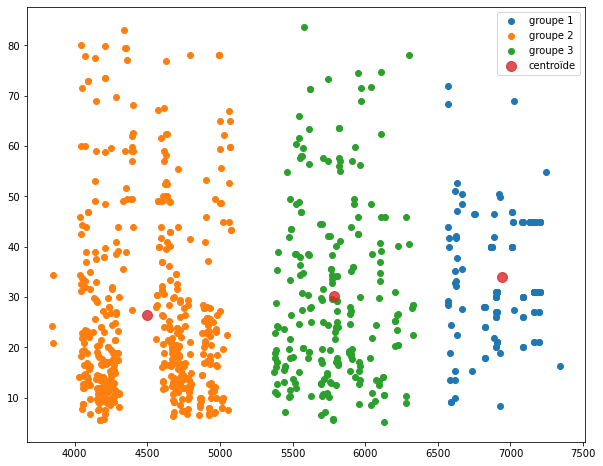

In [95]:
# Création des partitions du Data set
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]

# Visualisation
plt.figure(figsize=(10, 8))
plt.scatter(df1.product_id, df1.price, label="groupe 1")
plt.scatter(df2.product_id, df2.price, label="groupe 2")
plt.scatter(df3.product_id, df3.price, label="groupe 3")
# Afficher les centroïdes sur les deux axes
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            label="centroïde", s=100, alpha=0.8)
plt.legend()
plt.show()

#### - Nombre optimal de cluster

##### 1. Méthode de Coude (Elbow)

In [96]:
# Appliquer la fonction encodage()
data = preprocessing(data)

45.0    15
31.0    13
19.0     9
40.0     8
13.5     8
        ..
21.4     1
6.3      1
42.6     1
44.5     1
20.6     1
Name: price, Length: 345, dtype: int64


In [97]:
# Rangée de cluster
k_range = range(0, 30)
# Liste des erreurs
SSE = [] # SSE = Sum of Squared Error (somme des erreurs au carré)

# Implémentation
for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit_predict(data[["product_id", "price"]])
    
    # Ajout des éléments dans la liste
    SSE.append(model.inertia_) # inertia_ le paramètre permettant d'implémenter la méthode SSE

TypeError: tuple indices must be integers or slices, not list